In [10]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from zse.collections import *
from zse.utilities import *
from zse.rings import *

from matplotlib import cm

from collections import Counter
from collections import defaultdict as dd

from itertools import permutations as perm

from ase.visualize import view

In [11]:
def get_fw_data(file,code):
    file = open(file,'r')
    data = file.readlines()
    file.close()
    
    for i,line in enumerate(data):
        fields = line.split()
        if fields[0] == code:
            start = i
            break
    
    # go through fw chunk and get data
    
    t_sites = {}
    o_sites = {}
    for i,line in enumerate(data[start+1:]):
        line = line.rstrip(' \n')
        
        # check if the rings exist
        
#         if 'FAILED' in line or 'LARGE' in line:
#             return(False,False)
#         fields = line.split()
        
        # get the t site rings
        
        if 'T' in line and ':' in line:
            fields = line.split(':')
            t_sites[fields[0]]=fields[1]
#         for x in t_sites:
#             r = t_sites[x].split('_')
#             if len(r)>20:
#                 return(False,False)
                
        
        # get the o site rings
        if 'O' in line and ':' in line:
            fields = line.split(':')
            o_sites[fields[0]]=fields[1]
#         for x in o_sites:
#             r = o_sites[x]
#             if len(r)>20:
#                 return(False,False)
        
        
        
        fields = line.split()
        if fields[0] == 'Framework':
            end = i+start-1
            break

    return(t_sites,o_sites)    

In [12]:
vertex = 'iza_vertex_symbols.csv'
ov = 'ordered_vertex_rings.txt'

In [30]:
data = np.loadtxt('iza_vertex_symbols.csv',delimiter=',',dtype = str)
v_tsites = data[:,2]
v_frameworks = data[:,:2]

counts = sorted(Counter(v_tsites).items(),key = lambda item:(-item[1],item[0]))
print(len(counts))

649


In [21]:
fws = get_all_fws()
ov_sites = []
for f in fws:
    t_sites = get_fw_data(ov,f)[0]
    for t in t_sites:
        ov_sites.append(t_sites[t])


In [31]:
ov_counts = sorted(Counter(ov_sites).items(),key=lambda item:(-item[1],item[0]))
print(len(ov_counts))

666


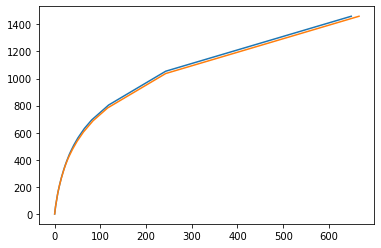

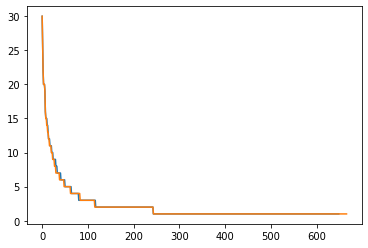

In [29]:
v_counts = [x[1] for x in counts]
ov_c = [x[1] for x in ov_counts]
s1 = [0]
for v in v_counts:
    s1.append(s1[-1]+v)
plt.plot(s1)
s2 = [0]
for v in ov_c:
    s2.append(s2[-1]+v)
plt.plot(s2)
plt.show()
plt.plot(v_counts)
plt.plot(ov_c)
plt.show()

In [52]:
tsites = get_fw_data('goetzke_rings.txt','AVE')[0]
for t in tsites:
    print(tsites[t])


4_4_4_6_6_8_8_8_8_8_12_12
4_4_6_6_6_8_10_10_10_10_12_12_12_12_12_12_12
4_4_6_6_6_8_10_10_12_12_12_12_12_12_12_12_12_12
4_4_4_6_6_8_8_8_8_8_10_10_10_10_12_12_12_12_12
